-Instantáneo:
    - Impulsar en el perigeo y el apogeo "intantáneamente" (hecho).
    - Impulsar 2 veces el apogeo.
    - Evaluar deorbiting.
    
-Finito:
    - Mismo escenario, considerando un impulso finito:
            - evaluar la duración del combustible sólido (o propulsión iónica en el caso deorbiting).
            - Cambio de masa durante la propulsión.
            
*Cambio de masa entre un impulso y otro.
*agregar el resto de las perturbaciones.
*Agregar sección que detecte cuándo y con qué potencia impulsarse.

In [1]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: inline;
}
</style>

In [4]:
import numpy as np
import scipy.integrate as integrate
from scipy.signal import argrelextrema
import matplotlib as mpl
import matplotlib.pyplot as  plt
import mplcursors
from mpl_toolkits.mplot3d import Axes3D

from models import atmosDensity
from maneuvers import Maneuvers
from coordinates import cart2kep

In [5]:
#Conwell's Method
# ----UNIVERSAL CONSTANTS----
# Universal Gravity
G = 6.67e-11
# Earth Mass
Me = 5.97e24
#Earth Radius
Re = 6378e3
#Earth Angular Speed
wE = np.array([0,0,7.2921159e-5])
#---------------------------
mu = G*Me
rp = Re+370e3
ra = Re+370e3
#rp = Re+350e3
#ra = Re+350e3
Omega = 340*np.pi/180
i = 65.1*np.pi/180
omega = 58*np.pi/180
M = 332*np.pi/180
#-------------------
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
h = (mu*a*(1-e**2))**0.5
T = 2*np.pi/mu**0.5*a**(3/2)
Aceleration = 0.1
#--------------------
print("Starting propagations...")
maneuvers = Maneuvers([a,e,i,omega,Omega,M,0,mu])
maneuvers.addPerturbation("atmosphere")

maneuvers.propagate(60*60,350)
print("=============================================================================")
print("First propagation ended...")

maneuvers.impulsive_maneuver(Aceleration,1)
maneuvers.propagate(60*3,370)
maneuvers.impulsive_maneuver(0,1)
print("=============================================================================")
print("Second propagation ended...")

maneuvers.propagate(60*60,350)
print("=============================================================================")
print("Last propagation ended.")

Starting propagations...
Day:0.0	Height: 370.0 km
Orbital Energy:-29504964.433906343
Day:8.146197006217566e-08	Height: 370.0000002165986 km
Orbital Energy:-29504964.43017201
Day:8.146197006217566e-08	Height: 369.9999997833995 km
Orbital Energy:-29504964.43774849
Day:1.6292394012435132e-07	Height: 369.9999999999991 km
Orbital Energy:-29504964.434014145
Day:1.6292394012435132e-07	Height: 369.9999995668009 km
Orbital Energy:-29504964.44159062
Day:2.4102756024514064e-05	Height: 369.99999959272054 km
Orbital Energy:-29504964.45697276
Day:2.4102756024514064e-05	Height: 369.99999954060183 km
Orbital Energy:-29504964.45788659
Day:4.8042588108903785e-05	Height: 369.9999996704692 km
Orbital Energy:-29504964.471457154
Day:4.8042588108903785e-05	Height: 369.9999995149039 km
Orbital Energy:-29504964.47417788
Day:7.198242019329349e-05	Height: 369.99999967038815 km
Orbital Energy:-29504964.487297215
Day:7.198242019329349e-05	Height: 369.99999951482283 km
Orbital Energy:-29504964.490017932
Day:0.00024

Day:3.000278332967858	Height: 369.4097017462682 km
Orbital Energy:-29507560.963423233
Day:3.000278332967858	Height: 369.4095758077195 km
Orbital Energy:-29507563.153504536
Day:3.0	Height: 369.4094522379553 km
Orbital Energy:-29507562.78400947
Day:3.00000017633212	Height: 369.4094533389816 km
Orbital Energy:-29507562.76637156
Day:3.00000017633212	Height: 369.4094513088865 km
Orbital Energy:-29507562.801883332
Day:3.000000352664239	Height: 369.4094524099119 km
Orbital Energy:-29507562.784245446
Day:3.000000352664239	Height: 369.4094503798168 km
Orbital Energy:-29507562.819757212
Day:3.000021697125218	Height: 369.40946079533177 km
Orbital Energy:-29507562.83374674
Day:3.000021697125218	Height: 369.4094607621664 km
Orbital Energy:-29507562.83432995
Day:3.000043041586196	Height: 369.4094712274 km
Orbital Energy:-29507562.847177036
Day:3.000043041586196	Height: 369.4094711290998 km
Orbital Energy:-29507562.84889554
Day:3.0000643860471747	Height: 369.40948159402797 km
Orbital Energy:-29507562

Day:6.000009235019278	Height: 368.81368862802907 km
Orbital Energy:-29510169.235973228
Day:6.000009235019278	Height: 368.81368791424853 km
Orbital Energy:-29510169.246257577
Day:6.0	Height: 368.81368424483856 km
Orbital Energy:-29510169.240714677
Day:6.000000052413282	Height: 368.8136843551481 km
Orbital Energy:-29510169.239180814
Day:6.000000052413282	Height: 368.8136841757521 km
Orbital Energy:-29510169.242319487
Day:6.000000104826562	Height: 368.8136842860617 km
Orbital Energy:-29510169.240785617
Day:6.000000104826562	Height: 368.8136841066657 km
Orbital Energy:-29510169.243924294
Day:6.000014344131363	Height: 368.813689705709 km
Orbital Energy:-29510169.25350257
Day:6.000014344131363	Height: 368.8136896991832 km
Orbital Energy:-29510169.25361693
Day:6.000028583436163	Height: 368.81369530367294 km
Orbital Energy:-29510169.262968447
Day:6.000028583436163	Height: 368.8136952841971 km
Orbital Energy:-29510169.26330895
Day:6.000042822740965	Height: 368.8137008843087 km
Orbital Energy:-2

Day:8.000500847482115	Height: 368.4153220583666 km
Orbital Energy:-29511894.39653552
Day:8.000500847482115	Height: 368.4152854346307 km
Orbital Energy:-29511895.03708539
Day:8.0	Height: 368.4158105442403 km
Orbital Energy:-29511894.660769127
Day:8.000000225517516	Height: 368.4158119696388 km
Orbital Energy:-29511894.631862633
Day:8.000000225517516	Height: 368.41580864807963 km
Orbital Energy:-29511894.689982682
Day:8.000000451035033	Height: 368.4158100734772 km
Orbital Energy:-29511894.661076188
Day:8.000000451035033	Height: 368.41580675191807 km
Orbital Energy:-29511894.71919623
Day:8.00002361503239	Height: 368.41578259635156 km
Orbital Energy:-29511894.734555457
Day:8.00002361503239	Height: 368.4157825501198 km
Orbital Energy:-29511894.735371694
Day:8.000046779029745	Height: 368.4157584841065 km
Orbital Energy:-29511894.749141946
Day:8.000046779029745	Height: 368.4157583474638 km
Orbital Energy:-29511894.75153561
Day:8.000069943027102	Height: 368.41573430146275 km
Orbital Energy:-295

Day:11.00001625528927	Height: 367.8080867211288 km
Orbital Energy:-29514576.183285538
Day:11.00001625528927	Height: 367.8081317796688 km
Orbital Energy:-29514575.39454567
Day:11.000427419498017	Height: 367.8074309344869 km
Orbital Energy:-29514575.847816113
Day:11.000427419498017	Height: 367.8074252956295 km
Orbital Energy:-29514575.946781803
Day:11.0	Height: 367.80814629940875 km
Orbital Energy:-29514575.60412704
Day:11.000000334954292	Height: 367.8081494046338 km
Orbital Energy:-29514575.540227402
Day:11.000000334954292	Height: 367.8081420758692 km
Orbital Energy:-29514575.668487854
Day:11.000000669908582	Height: 367.80814518108684 km
Orbital Energy:-29514575.604588237
Day:11.000000669908582	Height: 367.8081378523232 km
Orbital Energy:-29514575.73284868
Day:11.000027099474694	Height: 367.8080937510962 km
Orbital Energy:-29514575.750338826
Day:11.000027099474694	Height: 367.808093672324 km
Orbital Energy:-29514575.751733825
Day:11.00005352904081	Height: 367.80804968944284 km
Orbital E

Day:14.000351608069764	Height: 367.1923275695909 km
Orbital Energy:-29517305.63315633
Day:14.0	Height: 367.192705864857 km
Orbital Energy:-29517305.641800657
Day:14.000000234787173	Height: 367.192707409231 km
Orbital Energy:-29517305.61044323
Day:14.000000234787173	Height: 367.19270380769484 km
Orbital Energy:-29517305.673485048
Day:14.000000469574346	Height: 367.1927053520624 km
Orbital Energy:-29517305.64212762
Day:14.000000469574346	Height: 367.19270175052714 km
Orbital Energy:-29517305.70516942
Day:14.000023944359603	Height: 367.19267610092646 km
Orbital Energy:-29517305.721079726
Day:14.000023944359603	Height: 367.1926760520972 km
Orbital Energy:-29517305.721942354
Day:14.000047419144858	Height: 367.1926504244376 km
Orbital Energy:-29517305.736174602
Day:14.000047419144858	Height: 367.1926502801767 km
Orbital Energy:-29517305.738702726
Day:14.000070893930113	Height: 367.1926246010056 km
Orbital Energy:-29517305.75252084
Day:14.000070893930113	Height: 367.1926244567437 km
Orbital E

Day:17.000199672782927	Height: 366.56561047826335 km
Orbital Energy:-29520025.55262944
Day:17.000199672782927	Height: 366.5656068032058 km
Orbital Energy:-29520025.61677773
Day:17.0	Height: 366.565874209743 km
Orbital Energy:-29520025.47298118
Day:17.00000018897202	Height: 366.56587512517626 km
Orbital Energy:-29520025.452687208
Day:17.00000018897202	Height: 366.5658727916386 km
Orbital Energy:-29520025.493541393
Day:17.000000377944044	Height: 366.5658737070691 km
Orbital Energy:-29520025.47324741
Day:17.000000377944044	Height: 366.56587137353233 km
Orbital Energy:-29520025.514101595
Day:17.000022211608297	Height: 366.56584233188534 km
Orbital Energy:-29520025.529156838
Day:17.000022211608297	Height: 366.565842295384 km
Orbital Energy:-29520025.529801488
Day:17.00004404527255	Height: 366.5658132861769 km
Orbital Energy:-29520025.543598898
Day:17.00004404527255	Height: 366.56581317813976 km
Orbital Energy:-29520025.54549326
Day:17.000065878936798	Height: 366.565784146538 km
Orbital Ener

Day:20.00016695454206	Height: 365.9548319988465 km
Orbital Energy:-29522716.080556203
Day:20.0	Height: 365.9551177171003 km
Orbital Energy:-29522715.94342467
Day:20.000000194922983	Height: 365.9551186282439 km
Orbital Energy:-29522715.921821773
Day:20.000000194922983	Height: 365.9551161449719 km
Orbital Energy:-29522715.9653053
Day:20.000000389845965	Height: 365.9551170561118 km
Orbital Energy:-29522715.943702407
Day:20.000000389845965	Height: 365.95511457283885 km
Orbital Energy:-29522715.98718594
Day:20.000022448405772	Height: 365.95507716090793 km
Orbital Energy:-29522716.002562515
Day:20.000022448405772	Height: 365.9550771228345 km
Orbital Energy:-29522716.00323556
Day:20.000044506965583	Height: 365.9550397272911 km
Orbital Energy:-29522716.01730021
Day:20.000044506965583	Height: 365.9550396146458 km
Orbital Energy:-29522716.019276526
Day:20.00006656552539	Height: 365.9550021783346 km
Orbital Energy:-29522716.03301732
Day:20.00006656552539	Height: 365.95500206568835 km
Orbital Ener

Day:23.000217608118763	Height: 365.3256995418947 km
Orbital Energy:-29525448.76051134
Day:23.0	Height: 365.32604170613547 km
Orbital Energy:-29525448.635845013
Day:23.00000025315143	Height: 365.32604340263174 km
Orbital Energy:-29525448.599342227
Day:23.00000025315143	Height: 365.3260392133445 km
Orbital Energy:-29525448.672712773
Day:23.000000506302868	Height: 365.3260409098361 km
Orbital Energy:-29525448.63620998
Day:23.000000506302868	Height: 365.32603672054876 km
Orbital Energy:-29525448.70958052
Day:23.000024571326332	Height: 365.3259988763277 km
Orbital Energy:-29525448.72644551
Day:23.000024571326332	Height: 365.32599882225134 km
Orbital Energy:-29525448.727402397
Day:23.000048636349792	Height: 365.32596104226076 km
Orbital Energy:-29525448.742409676
Day:23.000048636349792	Height: 365.32596088265257 km
Orbital Energy:-29525448.74520964
Day:23.000072701373256	Height: 365.32592308560294 km
Orbital Energy:-29525448.75975904
Day:23.000072701373256	Height: 365.32592292599475 km
Orbit

Day:26.000301791520087	Height: 364.6738777004266 km
Orbital Energy:-29528273.74040136
Day:26.000301791520087	Height: 364.6738725917879 km
Orbital Energy:-29528273.83024883
Day:26.0	Height: 364.67435762271003 km
Orbital Energy:-29528273.592651077
Day:26.000000346199595	Height: 364.6743609861238 km
Orbital Energy:-29528273.524267677
Day:26.000000346199595	Height: 364.6743531497279 km
Orbital Energy:-29528273.661539722
Day:26.000000692399183	Height: 364.67435651313883 km
Orbital Energy:-29528273.593156345
Day:26.000000692399183	Height: 364.67434867674297 km
Orbital Energy:-29528273.730428398
Day:26.000027400145157	Height: 364.67430591393077 km
Orbital Energy:-29528273.749180026
Day:26.000027400145157	Height: 364.67430583157295 km
Orbital Energy:-29528273.750640027
Day:26.00005410789113	Height: 364.6742632240988 km
Orbital Energy:-29528273.766574755
Day:26.00005410789113	Height: 364.674262981873 km
Orbital Energy:-29528273.770824302
Day:26.000080815637105	Height: 364.6742204057584 km
Orbit

Day:29.000085660725876	Height: 364.01910615323015 km
Orbital Energy:-29531102.680626146
Day:29.0	Height: 364.0191360303946 km
Orbital Energy:-29531104.585438076
Day:29.000000178484317	Height: 364.0191367769074 km
Orbital Energy:-29531104.56731971
Day:29.000000178484317	Height: 364.0191346936263 km
Orbital Energy:-29531104.603820167
Day:29.000000356968638	Height: 364.019135440141 km
Orbital Energy:-29531104.585701816
Day:29.000000356968638	Height: 364.0191333568599 km
Orbital Energy:-29531104.622202273
Day:29.000021769081986	Height: 364.0190979857184 km
Orbital Energy:-29531104.63772055
Day:29.000021769081986	Height: 364.0190979518909 km
Orbital Energy:-29531104.638318647
Day:29.00004318119535	Height: 364.019062682325 km
Orbital Energy:-29531104.65266961
Day:29.00004318119535	Height: 364.0190625821706 km
Orbital Energy:-29531104.654427793
Day:29.000064593308696	Height: 364.01902736341395 km
Orbital Energy:-29531104.668490455
Day:29.000064593308696	Height: 364.0190272632586 km
Orbital En

Day:31.00008093085385	Height: 363.6018977755001 km
Orbital Energy:-29532938.673901465
Day:31.0	Height: 363.6016514210608 km
Orbital Energy:-29532941.424478587
Day:31.00000047746885	Height: 363.6016593776075 km
Orbital Energy:-29532941.294197123
Day:31.00000047746885	Height: 363.60164446712935 km
Orbital Energy:-29532941.555470858
Day:31.00000095493769	Height: 363.6016524236901 km
Orbital Energy:-29532941.42518938
Day:31.00000095493769	Height: 363.6016375132119 km
Orbital Energy:-29532941.68646311
Day:31.000030679468818	Height: 363.6016688097557 km
Orbital Energy:-29532941.707454417
Day:31.000030679468818	Height: 363.60166868307533 km
Orbital Energy:-29532941.709698018
Day:31.000060403999942	Height: 363.60170027972663 km
Orbital Energy:-29532941.726381615
Day:31.000060403999942	Height: 363.60169990850426 km
Orbital Energy:-29532941.732880525
Day:31.00009012853107	Height: 363.6017316133799 km
Orbital Energy:-29532941.748505227
Day:31.00009012853107	Height: 363.60173124215567 km
Orbital E

Day:34.00037496153593	Height: 362.9458277084641 km
Orbital Energy:-29535841.810163047
Day:34.0	Height: 362.9451940903431 km
Orbital Energy:-29535844.39041067
Day:34.000000209762426	Height: 362.94519579580145 km
Orbital Energy:-29535844.365345504
Day:34.000000209762426	Height: 362.94519291746525 km
Orbital Energy:-29535844.41579189
Day:34.000000419524845	Height: 362.9451946229236 km
Orbital Energy:-29535844.390726727
Day:34.000000419524845	Height: 362.94519174458736 km
Orbital Energy:-29535844.441173106
Day:34.00002301248134	Height: 362.9452204459384 km
Orbital Energy:-29535844.457822982
Day:34.00002301248134	Height: 362.94522040408475 km
Orbital Energy:-29535844.45856002
Day:34.00004560543783	Height: 362.94524918703826 km
Orbital Energy:-29535844.473768394
Day:34.00004560543783	Height: 362.94524906313234 km
Orbital Energy:-29535844.47593684
Day:34.00006819839433	Height: 362.9452778644273 km
Orbital Energy:-29535844.490787838
Day:34.00006819839433	Height: 362.94527774052136 km
Orbital E

Day:37.000457253800924	Height: 362.2933423341252 km
Orbital Energy:-29538722.60053138
Day:37.000457253800924	Height: 362.29333968496604 km
Orbital Energy:-29538722.646969672
Day:37.0	Height: 362.2929085308975 km
Orbital Energy:-29538722.27969434
Day:37.00000009403059	Height: 362.2929089100603 km
Orbital Energy:-29538722.274695534
Day:37.00000009403059	Height: 362.29290833155346 km
Orbital Energy:-29538722.28483653
Day:37.00000018806118	Height: 362.2929087107154 km
Orbital Energy:-29538722.27983773
Day:37.00000018806118	Height: 362.29290813220854 km
Orbital Energy:-29538722.28997873
Day:37.000017477007844	Height: 362.2929246633099 km
Orbital Energy:-29538722.30303598
Day:37.000017477007844	Height: 362.2929246490337 km
Orbital Energy:-29538722.303286716
Day:37.00003476595451	Height: 362.2929411947541 km
Orbital Energy:-29538722.31584859
Day:37.00003476595451	Height: 362.2929411522448 km
Orbital Energy:-29538722.31659269
Day:37.00005205490118	Height: 362.29295769104266 km
Orbital Energy:-

Day:40.00043985193033	Height: 361.6392740304731 km
Orbital Energy:-29541596.06524698
Day:40.0	Height: 361.63886293469557 km
Orbital Energy:-29541596.790522713
Day:40.00000026426579	Height: 361.63886543568316 km
Orbital Energy:-29541596.750661932
Day:40.00000026426579	Height: 361.6388608654719 km
Orbital Energy:-29541596.830791537
Day:40.000000528531594	Height: 361.6388633664548 km
Orbital Energy:-29541596.79093076
Day:40.000000528531594	Height: 361.6388587962445 km
Orbital Energy:-29541596.871060356
Day:40.000024927460395	Height: 361.6388787365258 km
Orbital Energy:-29541596.889388084
Day:40.000024927460395	Height: 361.6388786793733 km
Orbital Energy:-29541596.89039698
Day:40.00004932638921	Height: 361.6388986949604 km
Orbital Energy:-29541596.906761095
Day:40.00004932638921	Height: 361.63889852618706 km
Orbital Energy:-29541596.909717627
Day:40.00007372531802	Height: 361.63891853072585 km
Orbital Energy:-29541596.925596252
Day:40.00007372531802	Height: 361.6389183619516 km
Orbital Ene

Day:43.00012411577497	Height: 360.98993123111967 km
Orbital Energy:-29544453.734489106
Day:43.00012411577497	Height: 360.98992658632716 km
Orbital Energy:-29544453.815790687
Day:43.0	Height: 360.9897750401525 km
Orbital Energy:-29544453.723578222
Day:43.00000002608868	Height: 360.9897750943676 km
Orbital Energy:-29544453.72320799
Day:43.00000002608868	Height: 360.98977504981866 km
Orbital Energy:-29544453.723989226
Day:43.00000005217736	Height: 360.98977510403284 km
Orbital Energy:-29544453.723619003
Day:43.00000005217736	Height: 360.989775059483 km
Orbital Energy:-29544453.72440025
Day:43.000011321615574	Height: 360.98978885197823 km
Orbital Energy:-29544453.733187735
Day:43.000011321615574	Height: 360.9897888494143 km
Orbital Energy:-29544453.733232595
Day:43.00002259105378	Height: 360.98980263568086 km
Orbital Energy:-29544453.741930597
Day:43.00002259105378	Height: 360.98980262800774 km
Orbital Energy:-29544453.742064774
Day:43.000033860492	Height: 360.9898164041685 km
Orbital Ener

Day:44.00044945247785	Height: 360.7510770804072 km
Orbital Energy:-29545389.04789423
Day:44.00044945247785	Height: 360.75073310413956 km
Orbital Energy:-29545395.034498826
Day:44.0	Height: 360.7505087316679 km
Orbital Energy:-29545394.441518035
Day:44.00000016929254	Height: 360.75050975364354 km
Orbital Energy:-29545394.42520032
Day:44.00000016929254	Height: 360.75050787759386 km
Orbital Energy:-29545394.45810187
Day:44.000000338585075	Height: 360.7505088995742 km
Orbital Energy:-29545394.441784143
Day:44.000000338585075	Height: 360.75050702352263 km
Orbital Energy:-29545394.47468571
Day:44.000021367965594	Height: 360.7505175015088 km
Orbital Energy:-29545394.490935136
Day:44.000021367965594	Height: 360.7505174700692 km
Orbital Energy:-29545394.491489325
Day:44.00004239734611	Height: 360.7505280771134 km
Orbital Energy:-29545394.506652527
Day:44.00004239734611	Height: 360.7505279838955 km
Orbital Energy:-29545394.50828633
Day:44.00006342672662	Height: 360.75053867257947 km
Orbital Ener

Day:47.00059905037987	Height: 360.07565708701776 km
Orbital Energy:-29548362.8232182
Day:47.00059905037987	Height: 360.0755202938048 km
Orbital Energy:-29548365.22615008
Day:47.0	Height: 360.0747420647964 km
Orbital Energy:-29548364.462941196
Day:47.000000046362395	Height: 360.074742194809 km
Orbital Energy:-29548364.461743787
Day:47.000000046362395	Height: 360.0747420540778 km
Orbital Energy:-29548364.464212365
Day:47.0000000927248	Height: 360.07474218409135 km
Orbital Energy:-29548364.46301496
Day:47.0000000927248	Height: 360.0747420433611 km
Orbital Energy:-29548364.465483535
Day:47.00001374337344	Height: 360.0747596210567 km
Orbital Energy:-29548364.476293314
Day:47.00001374337344	Height: 360.0747596155228 km
Orbital Energy:-29548364.476390287
Day:47.000027394022084	Height: 360.07477722946646 km
Orbital Energy:-29548364.487007197
Day:47.000027394022084	Height: 360.0747772129327 km
Orbital Energy:-29548364.487296518
Day:47.00004104467072	Height: 360.0747948547667 km
Orbital Energy:-

Day:50.000028183959415	Height: 359.40776655177956 km
Orbital Energy:-29551332.48645591
Day:50.000028183959415	Height: 359.4077678953772 km
Orbital Energy:-29551332.46291432
Day:50.0	Height: 359.4077255177237 km
Orbital Energy:-29551332.44399735
Day:50.000000515512504	Height: 359.4077349900613 km
Orbital Energy:-29551332.29174878
Day:50.000000515512504	Height: 359.40771758721024 km
Orbital Energy:-29551332.597075645
Day:50.000001031025015	Height: 359.40772705955806 km
Orbital Energy:-29551332.444827083
Day:50.000001031025015	Height: 359.407709656707 km
Orbital Energy:-29551332.75015396
Day:50.00003150834686	Height: 359.40775532149894 km
Orbital Energy:-29551332.773420546
Day:50.00003150834686	Height: 359.40775518093443 km
Orbital Energy:-29551332.775913432
Day:50.00006198566871	Height: 359.4078011606513 km
Orbital Energy:-29551332.794402163
Day:50.00006198566871	Height: 359.40780074920787 km
Orbital Energy:-29551332.80161165
Day:50.00009246299056	Height: 359.4078468307117 km
Orbital Ene

Day:53.00032010203324	Height: 358.7343466594834 km
Orbital Energy:-29554332.191550963
Day:53.00032010203324	Height: 358.734296153577 km
Orbital Energy:-29554333.052222878
Day:53.00032010203324	Height: 358.73429613408445 km
Orbital Energy:-29554333.07042189
Day:53.0	Height: 358.7338587153489 km
Orbital Energy:-29554332.765668686
Day:53.00000001675007	Height: 358.7338587477971 km
Orbital Energy:-29554332.765521087
Day:53.00000001675007	Height: 358.7338587294212 km
Orbital Energy:-29554332.76584355
Day:53.00000003350015	Height: 358.7338587618684 km
Orbital Energy:-29554332.765695974
Day:53.00000003350015	Height: 358.73385874349157 km
Orbital Energy:-29554332.766018454
Day:53.0000097517532	Height: 358.7338722365517 km
Orbital Energy:-29554332.773922816
Day:53.0000097517532	Height: 358.73387223513515 km
Orbital Energy:-29554332.77394757
Day:53.00001947000626	Height: 358.7338857256053 km
Orbital Energy:-29554332.78180239
Day:53.00001947000626	Height: 358.7338857213585 km
Orbital Energy:-2955

Day:56.000092089733265	Height: 358.0394133317312 km
Orbital Energy:-29557399.775364734
Day:56.000092089733265	Height: 358.0394050681107 km
Orbital Energy:-29557399.95182351
Day:56.0	Height: 358.03926310142595 km
Orbital Energy:-29557399.910034355
Day:56.00000022171423	Height: 358.03926504945287 km
Orbital Energy:-29557399.88195584
Day:56.00000022171423	Height: 358.0392618290838 km
Orbital Energy:-29557399.938478965
Day:56.000000443428455	Height: 358.03926377710604 km
Orbital Energy:-29557399.910400447
Day:56.000000443428455	Height: 358.03926055673696 km
Orbital Energy:-29557399.966923572
Day:56.00002344100297	Height: 358.03929559454974 km
Orbital Energy:-29557399.985510096
Day:56.00002344100297	Height: 358.039295549443 km
Orbital Energy:-29557399.986305505
Day:56.00004643857749	Height: 358.0393306233548 km
Orbital Energy:-29557400.003337372
Day:56.00004643857749	Height: 358.03933048987386 km
Orbital Energy:-29557400.005676188
Day:56.000069436151996	Height: 358.03936553165596 km
Orbital

Day:59.00011867851786	Height: 357.346285671453 km
Orbital Energy:-29560475.80670619
Day:59.00011867851786	Height: 357.34614606807475 km
Orbital Energy:-29560478.243995048
Day:59.0	Height: 357.3461117616836 km
Orbital Energy:-29560478.103594065
Day:59.00000051096336	Height: 357.3461204798715 km
Orbital Energy:-29560477.953857362
Day:59.00000051096336	Height: 357.3461033723401 km
Orbital Energy:-29560478.25418621
Day:59.00000102192672	Height: 357.3461120904796 km
Orbital Energy:-29560478.10444952
Day:59.00000102192672	Height: 357.34609498294816 km
Orbital Energy:-29560478.40477837
Day:59.00003140041124	Height: 357.34610473801104 km
Orbital Energy:-29560478.42895654
Day:59.00003140041124	Height: 357.34610459891053 km
Orbital Energy:-29560478.431428373
Day:59.000061778895734	Height: 357.3461144607579 km
Orbital Energy:-29560478.450874064
Day:59.000061778895734	Height: 357.34611405368616 km
Orbital Energy:-29560478.45801838
Day:59.00009215738024	Height: 357.3461238118075 km
Orbital Energy:-

Day:62.00001373795205	Height: 356.63608198560587 km
Orbital Energy:-29563571.93940206
Day:62.00001373795205	Height: 356.6360829778919 km
Orbital Energy:-29563571.92348381
Day:62.0	Height: 356.6360963559756 km
Orbital Energy:-29563571.91182786
Day:62.000000004803645	Height: 356.6360963520575 km
Orbital Energy:-29563571.91181866
Day:62.000000004803645	Height: 356.6360963505441 km
Orbital Energy:-29563571.911845226
Day:62.000000009607305	Height: 356.63609634662697 km
Orbital Energy:-29563571.91183602
Day:62.000000009607305	Height: 356.63609634511454 km
Orbital Energy:-29563571.91186257
Day:62.00000640451095	Height: 356.63609012040587 km
Orbital Energy:-29563571.91728605
Day:62.00000640451095	Height: 356.6360901201377 km
Orbital Energy:-29563571.91729079
Day:62.000012799414584	Height: 356.63608389060107 km
Orbital Energy:-29563571.922704846
Day:62.000012799414584	Height: 356.6360838897983 km
Orbital Energy:-29563571.922719
Day:62.00001919431821	Height: 356.6360776550341 km
Orbital Energy:-

Day:63.00033608544876	Height: 356.3964276399985 km
Orbital Energy:-29564584.52108539
Day:63.00033608544876	Height: 356.3962631608555 km
Orbital Energy:-29564587.409493983
Day:63.00023276928215	Height: 356.39620556147025 km
Orbital Energy:-29564585.664506953
Day:63.00023276928215	Height: 356.39612026255855 km
Orbital Energy:-29564587.162259337
Day:63.0	Height: 356.3957781769233 km
Orbital Energy:-29564586.92704999
Day:63.00000019985179	Height: 356.3957797824182 km
Orbital Energy:-29564586.90423478
Day:63.00000019985179	Height: 356.39577716455796 km
Orbital Energy:-29564586.950205274
Day:63.00000039970357	Height: 356.395778770051 km
Orbital Energy:-29564586.927390065
Day:63.00000039970357	Height: 356.3957761521898 km
Orbital Energy:-29564586.973360565
Day:63.000022609413776	Height: 356.3958091181554 km
Orbital Energy:-29564586.99190941
Day:63.000022609413776	Height: 356.39580907891036 km
Orbital Energy:-29564586.992601436
Day:63.000044819123964	Height: 356.3958421016932 km
Orbital Energy

Day:66.00020899382751	Height: 355.6758266125927 km
Orbital Energy:-29567799.386022955
Day:66.00020899382751	Height: 355.675806547747 km
Orbital Energy:-29567799.73867633
Day:66.0	Height: 355.675560534223 km
Orbital Energy:-29567799.548410203
Day:66.00000024536399	Height: 355.6755628010947 km
Orbital Energy:-29567799.51396092
Day:66.00000024536399	Height: 355.6755588542959 km
Orbital Energy:-29567799.58328279
Day:66.00000049072798	Height: 355.6755611211583 km
Orbital Energy:-29567799.54883351
Day:66.00000049072798	Height: 355.6755571743604 km
Orbital Energy:-29567799.618155375
Day:66.00002427043118	Height: 355.6755855968855 km
Orbital Energy:-29567799.638208404
Day:66.00002427043118	Height: 355.67558554515523 km
Orbital Energy:-29567799.63912227
Day:66.00004805013437	Height: 355.675613982819 km
Orbital Energy:-29567799.65739323
Day:66.00004805013437	Height: 355.6756138299145 km
Orbital Energy:-29567799.66007537
Day:66.00007182983755	Height: 355.67564220450635 km
Orbital Energy:-29567799

Day:69.00017429494382	Height: 354.95979178712423 km
Orbital Energy:-29570968.77041506
Day:69.0	Height: 354.95965674904545 km
Orbital Energy:-29570971.73198526
Day:69.00000042137239	Height: 354.9596624601465 km
Orbital Energy:-29570971.63008709
Day:69.00000042137239	Height: 354.9596508176057 km
Orbital Energy:-29570971.834620945
Day:69.00000084274478	Height: 354.95965652866664 km
Orbital Energy:-29570971.732722804
Day:69.00000084274478	Height: 354.95964488612583 km
Orbital Energy:-29570971.937256657
Day:69.0000293178782	Height: 354.9596374015082 km
Orbital Energy:-29570971.961213402
Day:69.0000293178782	Height: 354.9596372941928 km
Orbital Energy:-29570971.96312028
Day:69.00005779301162	Height: 354.95962984542365 km
Orbital Energy:-29570971.983409222
Day:69.00005779301162	Height: 354.9596295304941 km
Orbital Energy:-29570971.988943074
Day:69.00008626814503	Height: 354.9596219554711 km
Orbital Energy:-29570972.008330535
Day:69.00008626814503	Height: 354.9596216405388 km
Orbital Energy:-2

Day:72.00015617768064	Height: 354.21682561404816 km
Orbital Energy:-29574218.01085404
Day:72.00015617768064	Height: 354.21682980360464 km
Orbital Energy:-29574217.951433092
Day:72.0	Height: 354.21716236560326 km
Orbital Energy:-29574217.822643116
Day:72.00000033891408	Height: 354.21716541419363 km
Orbital Energy:-29574217.75675661
Day:72.00000033891408	Height: 354.21715788080076 km
Orbital Energy:-29574217.88913099
Day:72.00000067782815	Height: 354.21716092937066 km
Orbital Energy:-29574217.823244482
Day:72.00000067782815	Height: 354.2171533959769 km
Orbital Energy:-29574217.95561887
Day:72.00002715582907	Height: 354.21709726582094 km
Orbital Energy:-29574217.978388667
Day:72.00002715582907	Height: 354.21709718561175 km
Orbital Energy:-29574217.97981586
Day:72.00005363383	Height: 354.2170410857871 km
Orbital Energy:-29574217.999832522
Day:72.00005363383	Height: 354.2170408498719 km
Orbital Energy:-29574218.00398629
Day:72.00008011183094	Height: 354.2169846597593 km
Orbital Energy:-2957

Day:75.00028092978349	Height: 353.4473405159442 km
Orbital Energy:-29577465.84675145
Day:75.00028092978349	Height: 353.4456937266095 km
Orbital Energy:-29577495.016966928
Day:75.00015109898952	Height: 353.44622927375974 km
Orbital Energy:-29577493.4048043
Day:75.00015109898952	Height: 353.4462293450199 km
Orbital Energy:-29577493.40355133
Day:75.0	Height: 353.44675695912633 km
Orbital Energy:-29577493.267964367
Day:75.00000038679967	Height: 353.4467605141019 km
Orbital Energy:-29577493.18206055
Day:75.00000038679967	Height: 353.4467506992668 km
Orbital Energy:-29577493.35456351
Day:75.00000077359935	Height: 353.4467542542508 km
Orbital Energy:-29577493.26865971
Day:75.00000077359935	Height: 353.4467444394166 km
Orbital Energy:-29577493.44116266
Day:75.00002844112481	Height: 353.4466477706935 km
Orbital Energy:-29577493.465164017
Day:75.00002844112481	Height: 353.446647674717 km
Orbital Energy:-29577493.466876604
Day:75.00005610865027	Height: 353.4465512412116 km
Orbital Energy:-2957749

Day:78.00030770751945	Height: 352.67346605154313 km
Orbital Energy:-29580809.23920466
Day:78.00030770751945	Height: 352.67333365497177 km
Orbital Energy:-29580811.588975314
Day:78.000213998866	Height: 352.6735751422271 km
Orbital Energy:-29580810.125267267
Day:78.000213998866	Height: 352.67350502087174 km
Orbital Energy:-29580811.370530475
Day:78.0	Height: 352.6738890905464 km
Orbital Energy:-29580811.138274897
Day:78.00000017914498	Height: 352.6738898192067 km
Orbital Energy:-29580811.119928442
Day:78.00000017914498	Height: 352.6738877133932 km
Orbital Energy:-29580811.156948205
Day:78.00000035828995	Height: 352.6738884420609 km
Orbital Energy:-29580811.138601728
Day:78.00000035828995	Height: 352.67388633624745 km
Orbital Energy:-29580811.17562149
Day:78.00002176066431	Height: 352.6738476702189 km
Orbital Energy:-29580811.19483967
Day:78.00002176066431	Height: 352.6738476361595 km
Orbital Energy:-29580811.195444077
Day:78.00004316303865	Height: 352.67380914457794 km
Orbital Energy:-29

Day:81.00029294301741	Height: 351.91578314720186 km
Orbital Energy:-29584142.623833627
Day:81.0	Height: 351.91567751630396 km
Orbital Energy:-29584145.509986203
Day:81.0000000988296	Height: 351.9156778101651 km
Orbital Energy:-29584145.504441824
Day:81.0000000988296	Height: 351.91567716912925 km
Orbital Energy:-29584145.515713636
Day:81.00000019765918	Height: 351.9156774629913 km
Orbital Energy:-29584145.510169275
Day:81.00000019765918	Height: 351.91567682195546 km
Orbital Energy:-29584145.521441102
Day:81.00001774750072	Height: 351.91567213166877 km
Orbital Energy:-29584145.537561063
Day:81.00001774750072	Height: 351.91567211635595 km
Orbital Energy:-29584145.53783159
Day:81.00003529734225	Height: 351.9156675271532 km
Orbital Energy:-29584145.553418647
Day:81.00003529734225	Height: 351.91566748160403 km
Orbital Energy:-29584145.55421986
Day:81.00005284718381	Height: 351.91566297045813 km
Orbital Energy:-29584145.569674604
Day:81.00005284718381	Height: 351.9156629249109 km
Orbital Ener

Day:83.00047297112614	Height: 351.454723987001 km
Orbital Energy:-29586355.31378011
Day:83.0	Height: 351.45425687106047 km
Orbital Energy:-29586357.546245646
Day:83.00000048478529	Height: 351.45426492946876 km
Orbital Energy:-29586357.411052458
Day:83.00000048478529	Height: 351.45424950298855 km
Orbital Energy:-29586357.68234429
Day:83.00000096957059	Height: 351.4542575613549 km
Orbital Energy:-29586357.547151115
Day:83.00000096957059	Height: 351.45424213487564 km
Orbital Energy:-29586357.818442933
Day:83.00003079395574	Height: 351.45426334985905 km
Orbital Energy:-29586357.84512954
Day:83.00003079395574	Height: 351.4542632202245 km
Orbital Energy:-29586357.847435042
Day:83.00006061834091	Height: 351.4542845325526 km
Orbital Energy:-29586357.869699087
Day:83.00006061834091	Height: 351.4542841528226 km
Orbital Energy:-29586357.87637293
Day:83.00009044272608	Height: 351.45430536622365 km
Orbital Energy:-29586357.897550605
Day:83.00009044272608	Height: 351.45430498648994 km
Orbital Energy

Day:86.0003396641227	Height: 350.6763388283057 km
Orbital Energy:-29589753.833324034
Day:86.0	Height: 350.6764639808107 km
Orbital Energy:-29589756.590639774
Day:86.00000023933103	Height: 350.6764656551592 km
Orbital Energy:-29589756.55779099
Day:86.00000023933103	Height: 350.6764618944805 km
Orbital Energy:-29589756.62394204
Day:86.00000047866206	Height: 350.6764635688197 km
Orbital Energy:-29589756.591093272
Day:86.00000047866206	Height: 350.676459808141 km
Orbital Energy:-29589756.65724432
Day:86.00002404431928	Height: 350.6764395123245 km
Orbital Energy:-29589756.67912189
Day:86.00002404431928	Height: 350.6764394621272 km
Orbital Energy:-29589756.680012777
Day:86.0000476099765	Height: 350.6764191929018 km
Orbital Energy:-29589756.700157255
Day:86.0000476099765	Height: 350.6764190446194 km
Orbital Energy:-29589756.702767923
Day:86.00007117563372	Height: 350.67639872642235 km
Orbital Energy:-29589756.72248451
Day:86.00007117563372	Height: 350.67639857814 km
Orbital Energy:-29589756.7

First propagation ended...
Day:89.00003883314851	Height: 358.9062344239354 km
Orbital Energy:-29554201.811540335
Day:89.00003883314851	Height: 358.9062449187357 km
Orbital Energy:-29554201.627097715
Day:89.00025026545887	Height: 358.9072673125686 km
Orbital Energy:-29554166.971706215
Day:89.00025026545887	Height: 358.90726886088027 km
Orbital Energy:-29554166.944369946
Day:89.0	Height: 358.9060486753723 km
Orbital Energy:-29554207.681526646
Day:89.00000005147614	Height: 358.906049020987 km
Orbital Energy:-29554207.680045713
Day:89.00000005147614	Height: 358.9060488474397 km
Orbital Energy:-29554207.683090955
Day:89.00000010295226	Height: 358.9060491930526 km
Orbital Energy:-29554207.681609817
Day:89.00000010295226	Height: 358.90604901950434 km
Orbital Energy:-29554207.68465506
Day:89.00001423620598	Height: 358.9061199434027 km
Orbital Energy:-29554207.688506898
Day:89.00001423620598	Height: 358.9061199370865 km
Orbital Energy:-29554207.68861651
Day:89.00002836945974	Height: 358.9061905

Day:94.000047630845	Height: 368.8744512991328 km
Orbital Energy:-29509500.036662713
Day:94.000047630845	Height: 368.87444843035007 km
Orbital Energy:-29509500.08618151
Day:94.00013264833571	Height: 368.87214929425437 km
Orbital Energy:-29509500.142377716
Day:94.00013264833571	Height: 368.872149229669 km
Orbital Energy:-29509500.1435161
Day:94.00021766582641	Height: 368.8698562953966 km
Orbital Energy:-29509500.202170044
Day:94.00021766582641	Height: 368.8698563605184 km
Orbital Energy:-29509500.201024693
Day:94.00030268331712	Height: 368.8675700156707 km
Orbital Energy:-29509500.258132022
Day:94.00030268331712	Height: 368.86756999497766 km
Orbital Energy:-29509500.25849046
Day:94.00038770080782	Height: 368.8652902870141 km
Orbital Energy:-29509500.315999422
Day:94.00038770080782	Height: 368.86529028930516 km
Orbital Energy:-29509500.31596117
Day:94.00047271829852	Height: 368.8630174001055 km
Orbital Energy:-29509500.373471744
Day:94.00047271829852	Height: 368.86301740222984 km
Orbital 

Day:108.00030412815921	Height: 365.8563722480238 km
Orbital Energy:-29522050.36329324
Day:108.00030412815921	Height: 365.85637040294614 km
Orbital Energy:-29522050.395558767
Day:108.0008869937671	Height: 365.86447843903585 km
Orbital Energy:-29522050.56363205
Day:108.0008869937671	Height: 365.8644607941378 km
Orbital Energy:-29522050.872909065
Day:109.00020137349377	Height: 365.8953296725303 km
Orbital Energy:-29522922.01441309
Day:109.00076063846059	Height: 365.880267054175 km
Orbital Energy:-29522922.885224774
Day:110.00051852339249	Height: 365.9183564958861 km
Orbital Energy:-29523861.315065123
Day:110.00106801063482	Height: 365.92470062599705 km
Orbital Energy:-29523861.027831223
Day:111.00035869719396	Height: 365.24362744973416 km
Orbital Energy:-29524770.854627527
Day:111.00035869719396	Height: 365.24362266943325 km
Orbital Energy:-29524770.938424353
Day:111.00072029628727	Height: 365.2488048313223 km
Orbital Energy:-29524771.120474316
Day:111.00072029628727	Height: 365.248800060

Day:119.0007221826105	Height: 364.0291511151697 km
Orbital Energy:-29532238.439538017
Day:119.0007221826105	Height: 364.02851045102625 km
Orbital Energy:-29532249.625486158
Day:120.00008724272669	Height: 363.3867324444428 km
Orbital Energy:-29533190.73036949
Day:120.000207979065	Height: 363.3891603649566 km
Orbital Energy:-29533190.818788376
Day:120.00032871540328	Height: 363.3916104545789 km
Orbital Energy:-29533190.918371245
Day:120.00081080504816	Height: 363.40159954210276 km
Orbital Energy:-29533191.560077883
Day:120.00081080504816	Height: 363.4016372459121 km
Orbital Energy:-29533191.229719758
Day:120.00081080504816	Height: 363.40157373057866 km
Orbital Energy:-29533191.786236644
Day:120.00081080504816	Height: 363.40156260272397 km
Orbital Energy:-29533191.88373813
Day:120.00081080504816	Height: 363.40159954210276 km
Orbital Energy:-29533191.08608995
Day:120.00081080504816	Height: 363.40159954210276 km
Orbital Energy:-29533191.554474726
Day:120.00081080504816	Height: 363.401599542

Day:133.00016020668207	Height: 360.4019940564884 km
Orbital Energy:-29545822.99052436
Day:133.00016020668207	Height: 360.40199513038436 km
Orbital Energy:-29545822.971681807
Day:133.00040107848264	Height: 360.40210378619656 km
Orbital Energy:-29545823.180354815
Day:133.00040107848264	Height: 360.40210486131997 km
Orbital Energy:-29545823.161494777
Day:133.001062024859	Height: 360.4031450207606 km
Orbital Energy:-29545824.223935384
Day:133.001062024859	Height: 360.40318666490725 km
Orbital Energy:-29545823.493479438
Day:133.00087682020487	Height: 360.40275310144665 km
Orbital Energy:-29545823.69462801
Day:133.00087682020487	Height: 360.4027644025795 km
Orbital Energy:-29545823.496398248
Day:134.00023806243397	Height: 360.541191319027 km
Orbital Energy:-29546816.806578837
Day:134.00079969019154	Height: 360.52737605887654 km
Orbital Energy:-29546816.50518075
Day:134.00079969019154	Height: 360.5271997092059 km
Orbital Energy:-29546819.605873115
Day:135.00051912855065	Height: 360.4011638565

Day:149.00014769343616	Height: 356.71948178702314 km
Orbital Energy:-29562093.839293864
Day:149.00014769343616	Height: 356.7194544623233 km
Orbital Energy:-29562094.317225933
Day:149.00062037083336	Height: 356.72568834223875 km
Orbital Energy:-29562094.29787164
Day:149.00062037083336	Height: 356.72566368509365 km
Orbital Energy:-29562094.733456913
Day:149.0010930482306	Height: 356.7324040645938 km
Orbital Energy:-29562094.735577445
Day:149.0010930482306	Height: 356.73238003105854 km
Orbital Energy:-29562095.156010054
Day:150.00014240639115	Height: 356.66801644399294 km
Orbital Energy:-29563154.780073144
Day:150.0002858361821	Height: 356.6642358427141 km
Orbital Energy:-29563154.91254189
Day:150.00042926597303	Height: 356.66046485431025 km
Orbital Energy:-29563155.049666476
Day:150.00066183938708	Height: 356.65437483090165 km
Orbital Energy:-29563155.264316246
Day:150.00066183938708	Height: 356.6542831267612 km
Orbital Energy:-29563156.06943231
Day:150.00066183938708	Height: 356.6543818

Day:166.0004339109395	Height: 352.57156522738467 km
Orbital Energy:-29580398.156591844
Day:166.0004339109395	Height: 352.57151985647346 km
Orbital Energy:-29580398.953740496
Day:166.00096051621765	Height: 352.5796962804822 km
Orbital Energy:-29580398.669630844
Day:166.00096051621765	Height: 352.5796503448421 km
Orbital Energy:-29580399.47840956
Day:167.00023878758012	Height: 352.4402609050134 km
Orbital Energy:-29581523.815184724
Day:167.00023878758012	Height: 352.4401705758665 km
Orbital Energy:-29581524.60922244
Day:167.00023878758012	Height: 352.44026528181604 km
Orbital Energy:-29581523.77671047
Day:167.00023878758012	Height: 352.440255319587 km
Orbital Energy:-29581523.86428337
Day:167.00023878758012	Height: 352.4402609050134 km
Orbital Energy:-29581523.803593423
Day:167.00023878758012	Height: 352.4402609050134 km
Orbital Energy:-29581524.00887292
Day:167.00023878758012	Height: 352.4402609050134 km
Orbital Energy:-29581524.49152831
Day:167.0008004264113	Height: 352.42659342942574 

In [6]:
#Cleanup
validPoints = np.all(abs(maneuvers.rTrace) > 1e-10,axis=1)
rTrace = maneuvers.rTrace[validPoints]
vTrace = maneuvers.vTrace[validPoints]
tTrace = maneuvers.tTrace[validPoints]

#Get Perigees and Apogees
perigees = []
apogees = []
for i in range(0,len(tTrace)):
    a,e = cart2kep(rTrace[i,:],vTrace[i,:])
    rp = (1-e)*a
    ra = (1+e)*a
    perigees.append(rp)
    apogees.append(ra)
perigees = np.asarray(perigees)
apogees = np.asarray(apogees)

<IPython.core.display.Javascript object>


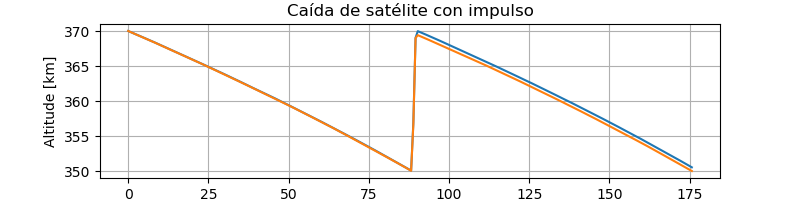

In [10]:
#PLOTTING
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'

p1 = plt.figure(figsize=(8,2))
plt.plot(tTrace[:-2:1000]/60/60/24,(apogees[:-2:1000]-Re)/1e3);
plt.plot(tTrace[:-2:1000]/60/60/24,(perigees[:-2:1000]-Re)/1e3);
plt.grid();
plt.title("Caída de satélite con impulso")
plt.xlabel("time [days]")
plt.ylabel("Altitude [km]")
mplcursors.cursor(hover=True);

In [8]:
a = (350e3+Re+370e3+Re)/2
T = 2*np.pi*(a**3/mu)**0.5
print(T/60/60)
A = np.array([1, 2, 3])
B = np.array([3, 2, 1])
C = A*B
print(C)

1.5297617407237356
[3 4 3]


<IPython.core.display.Javascript object>


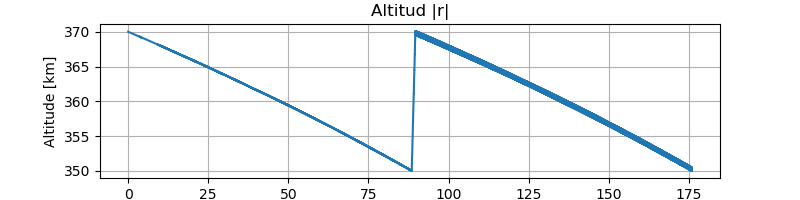

Text(0,0.5,'Altitude [km]')

In [9]:
Z = np.array([])
X3 = np.array([])
Y3 = np.array([])
Z3 = np.array([])

#THIS ITERATION HAVE TO BE OPTIMISED
for i in range(len(maneuvers.rTrace)):
    X3 = np.append(X3,maneuvers.rTrace[i][0])
    Y3 = np.append(Y3,maneuvers.rTrace[i][1])
    Z3 = np.append(Z3,maneuvers.rTrace[i][2])
    Z = np.append(Z,np.linalg.norm(maneuvers.rTrace[i])-Re)
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'

p2 = plt.figure(figsize=(8,2))
plt.plot(maneuvers.tTrace/60/60/24,(Z/1e3));
plt.grid();
plt.title("Altitud |r|")
plt.xlabel("time [days]")
plt.ylabel("Altitude [km]")

In [ ]:
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'
#plt.figure(figsize=(8,2))
ax = plt.axes(projection='3d')
ax.set_aspect("equal")

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = Re*np.cos(u)*np.sin(v)
y = Re*np.sin(u)*np.sin(v)
z = Re*np.cos(v)
ax.plot_wireframe(x, y, z, color="r")
ax.plot3D(X3, Y3, Z3, 'gray')
ax.scatter(maneuvers.current_r[0], maneuvers.current_r[1], maneuvers.current_r[2])
#plt.grid();